In [16]:
# Always run this block first whenever you change the bvd_library.py file, otherwise the change won't be updated to this notebook.
import importlib
import bvd_library
importlib.reload(bvd_library)
from bvd_library import *
import os

# add %matplotlib widget to make plots interactive
%matplotlib widget
mpl.style.use('seaborn')
mpl.style.use('seaborn-muted')

First, we create a BVD_Model instance and load file. Then we plot |S11| and identify resonance.

In [18]:
bvd_model = BVD_Model()
power100 = bvd_model.load_directory('IDT_PMMA_SWP_RT/100w/', db=True)
power75 = bvd_model.load_directory('IDT_PMMA_SWP_RT/75w/', db=True)
power50 = bvd_model.load_directory('IDT_PMMA_SWP_RT/50w/', db=True)
power30 = bvd_model.load_directory('IDT_PMMA_SWP_RT/30w/', db=True)
# power100 = power100.extend([0, 0, 0,])
# power75 = power75.extend([0, 0, 0])
# power30 = power30.extend([0, 0, 0])
print(power100)
print(power75)
print(power50)
print(power30)
print(10*np.log10(0.95783))


IDT_PMMA_SWP_RT/100w/100w_0.s2p
IDT_PMMA_SWP_RT/100w/100w_1.s2p
IDT_PMMA_SWP_RT/100w/100w_2.s2p
IDT_PMMA_SWP_RT/100w/100w_3.s2p
IDT_PMMA_SWP_RT/100w/100w_4.s2p
IDT_PMMA_SWP_RT/100w/100w_5.s2p
IDT_PMMA_SWP_RT/100w/100w_6.s2p
IDT_PMMA_SWP_RT/75w/75w_0.s2p
IDT_PMMA_SWP_RT/75w/75w_1.s2p
IDT_PMMA_SWP_RT/75w/75w_2.s2p
IDT_PMMA_SWP_RT/75w/75w_3.s2p
IDT_PMMA_SWP_RT/75w/75w_4.s2p
IDT_PMMA_SWP_RT/75w/75w_5.s2p
IDT_PMMA_SWP_RT/75w/75w_6.s2p
IDT_PMMA_SWP_RT/50w/50w_0.s2p
IDT_PMMA_SWP_RT/50w/50w_1.s2p
IDT_PMMA_SWP_RT/50w/50w_2.s2p
IDT_PMMA_SWP_RT/50w/50w_3.s2p
IDT_PMMA_SWP_RT/50w/50w_4.s2p
IDT_PMMA_SWP_RT/50w/50w_5.s2p
IDT_PMMA_SWP_RT/50w/50w_6.s2p
IDT_PMMA_SWP_RT/30w/30w_0.s2p
IDT_PMMA_SWP_RT/30w/30w_1.s2p
IDT_PMMA_SWP_RT/30w/30w_2.s2p
IDT_PMMA_SWP_RT/30w/30w_3.s2p
IDT_PMMA_SWP_RT/30w/30w_4.s2p
IDT_PMMA_SWP_RT/30w/30w_5.s2p
IDT_PMMA_SWP_RT/30w/30w_6.s2p
IDT_PMMA_SWP_RT/30w/30w_7.s2p
IDT_PMMA_SWP_RT/30w/30w_8.s2p
IDT_PMMA_SWP_RT/30w/30w_9.s2p
[-7.793172053256857, -22.744086222117318, -8.14566327884

In [21]:
data = [power100, power75, power50, power30]
data = np.zeros(shape=(4, 10))
data[0,0:7] = power100
data[1,0:7] = power75
data[2,0:7] = power50
data[3,:] = power30
data = data * (-1)
print(data)

[[ 7.79317205 22.74408622  8.14566328  8.54160565  6.91965326  5.68436552
   6.79945793 -0.         -0.         -0.        ]
 [ 5.88888766 13.95375874 21.03326553  9.99751429 11.17599467  6.66833494
   6.85580543 -0.         -0.         -0.        ]
 [ 4.09125744  7.4142603  10.84365274 17.81734918 17.30293747 11.35798583
   8.17081254 -0.         -0.         -0.        ]
 [ 2.51829886  4.45760394  5.65364515  7.32498052  6.46033641 13.75073965
  14.62952363 15.97288992  9.75642717 10.3660499 ]]


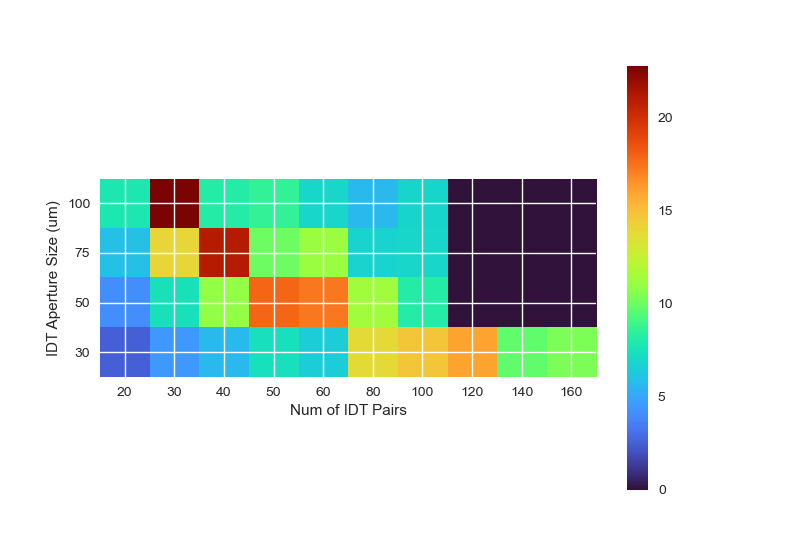

In [22]:
plt.figure()
plt.imshow(data, cmap='turbo')
plt.imshow(data, cmap='turbo')
plt.xlabel('Num of IDT Pairs')
plt.yticks(range(0,4), ['100', '75', '50', '30'])
plt.xticks(range(0,10), ['20', '30', '40', '50', '60', '80', '100', '120', '140', '160'])
plt.ylabel('IDT Aperture Size (um)')
plt.colorbar()

IDT_PMMA_SWP_RT/100w/100w_0.s2p
IDT_PMMA_SWP_RT/100w/100w_1.s2p
IDT_PMMA_SWP_RT/100w/100w_2.s2p
IDT_PMMA_SWP_RT/100w/100w_3.s2p
IDT_PMMA_SWP_RT/100w/100w_4.s2p
IDT_PMMA_SWP_RT/100w/100w_5.s2p
IDT_PMMA_SWP_RT/100w/100w_6.s2p
[0.83378018497607, 0.9946839215924126, 0.8467382881379828, 0.86009300287515, 0.7967480717634442, 0.7298758282247902, 0.7910443074057927]


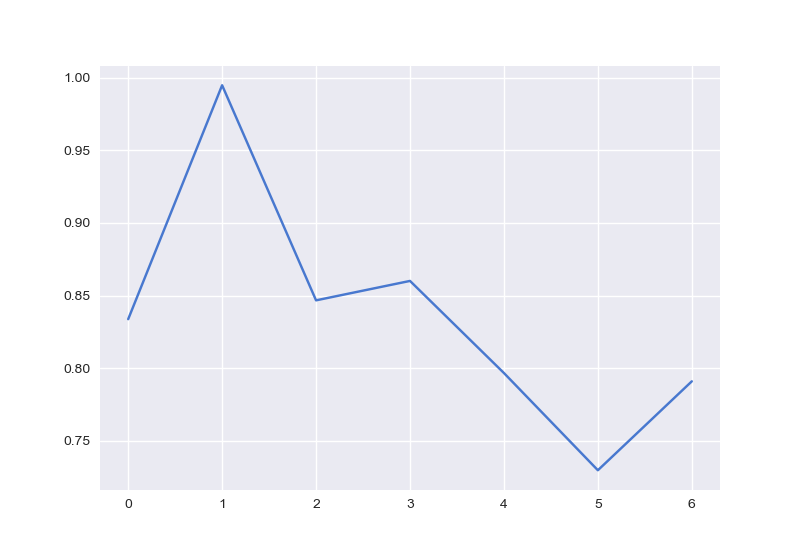

In [5]:
power_list = []
directory = 'IDT_PMMA_SWP_RT/100w/'
for filename in sorted(os.listdir(directory)):
    file = os.path.join(directory, filename)
    print(file)
    bvd_model = BVD_Model()
    bvd_model.load_file(file)
    power = bvd_model.power
    power_list.append(1-power)
print(power_list)
plt.figure()
plt.plot(power_list)

0.5599769027129445


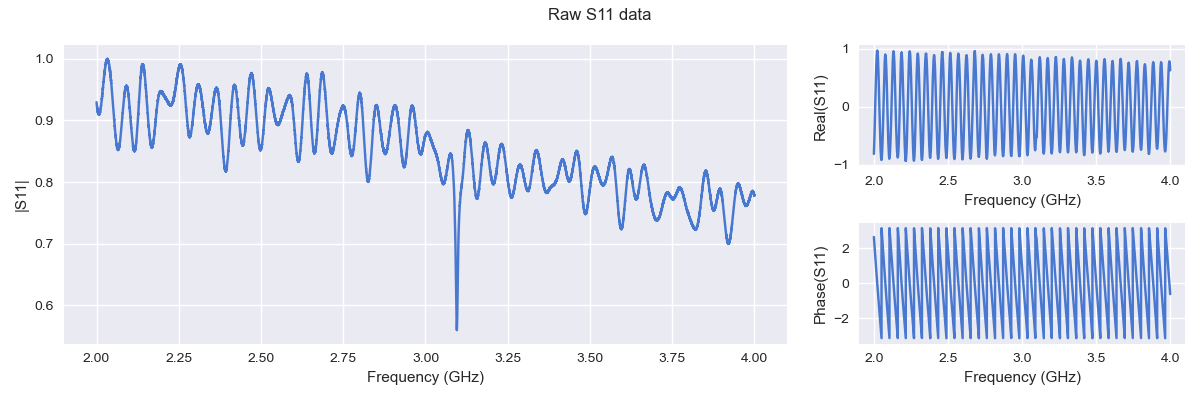

In [23]:
bvd_model = BVD_Model()
file_name = 'IDT_PMMA_SWP_RT/30w/30w_0.s2p'
bvd_model.load_file(file_name, normalize=True)
bvd_model.plot_s11(figscale=1, db=False)
print(bvd_model.power)
# print(bvd_model.powerdB)

Text(0, 0.5, 'A2(z)')

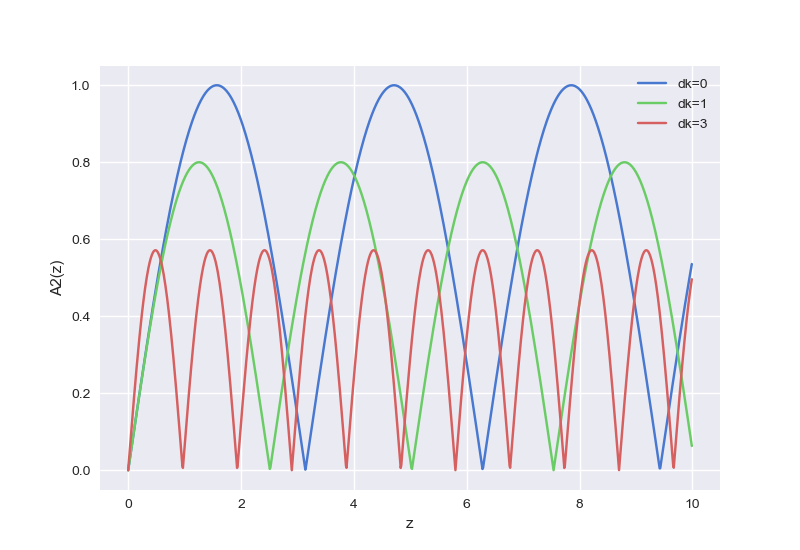

In [34]:
import math
x = np.arange(0,10, 0.01)
dk = 0
K1 = 1
K2 = 1
g = math.sqrt(K1*K2) + 0.25*dk*dk
y0 = K2*K2/(K1*K2 + 0.25*dk) * np.sin(x*g)

dk = 1
K1 = 1
K2 = 1
g = math.sqrt(K1*K2) + 0.25*dk*dk
y1 = K2*K2/(K1*K2 + 0.25*dk) * np.sin(x*g)

dk = 3
K1 = 1
K2 = 1
g = math.sqrt(K1*K2) + 0.25*dk*dk
y2 = K2*K2/(K1*K2 + 0.25*dk) * np.sin(x*g)


plt.figure()
plt.plot(x,abs(y0))
plt.plot(x,abs(y1))
plt.plot(x,abs(y2))
plt.legend(['dk=0', 'dk=1', 'dk=3'])
plt.xlabel('z')
plt.ylabel('A2(z)')



From the |S11| plot, we can identify the background frequency range with <span style="color:green">[fbs, fbe]</span>, and the resonance region with <span style="color:green">[frs, fre]</span>. We first do background fitting to obtain Rs, Ls, Rp, Cp; then we do resonance fitting to obtain Rm, Cm, Lm. Procedure for fitting S11 with BVD model is:

From S11 data, we compute raw impedance using $Z_0 = Z_{char} \times \dfrac{1+S11}{1-S11}$, where characteristic impedance $Z_{char}$ is taken to be 50 ohm. Raw admittance is $Y_0 = \dfrac{1}{Z_0}$.

We slice two flat regions out of raw impedance and concatenate them to obtain background impledance data $Z_{bg}$, which can be fitted using equation: $$Z_{bg,fit}= R_s + jwL_s + \dfrac{1}{\dfrac{1}{R_p} + jwC_p}$$

We fit $Z_{bg}$ data with $Z_{bg,fit}$ equation using <span style="color:blue">bvd_model.fit_BVD_model_background</span> method and obtain <span style="color:red">[Rs, Ls, Rp, Cp]</span>; 

Ls = -0.6950820926416466 nH; Rs = 1.8147029397275225 Ohm; Rp = 150085934.3492944 Ohm; Cp = 0.00033988500536969373 nF


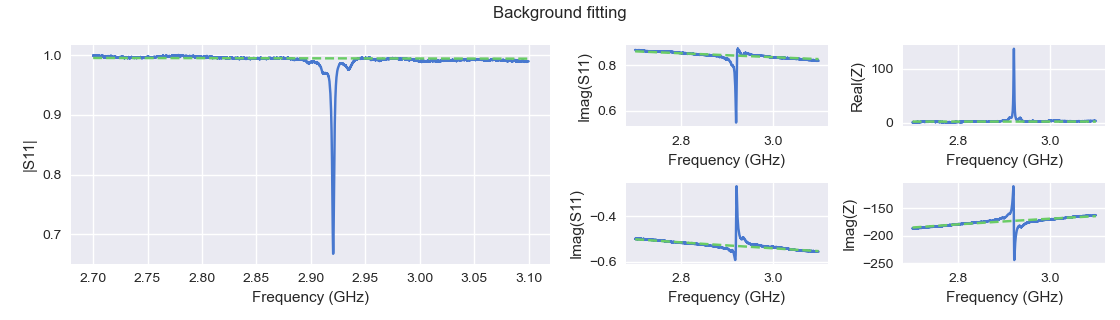

In [5]:
fbs, frs, fre, fbe = 2.7e9, 2.9e9, 2.95e9, 3e9
_, _, BG_fit_params = bvd_model.fit_BVD_model_background(start1=fbs, end1=frs, start2=fre, end2=fbe,
                                                          plot_fit=True, figscale=0.8)
[Ls, Rs, Rp, Cp] = BG_fit_params
print('Ls =', Ls, 'nH;', 'Rs =', Rs, 'Ohm;', 'Rp =', Rp, 'Ohm;', 'Cp =', Cp, 'nF')

Using the fitted [Ls, Rs, Rp, Cp], we de-background raw admittance data $Y_0$ to obtain: $$Y_a = \dfrac{1}{Z_0 - R_s - jwL_s} - (\dfrac{1}{R_p} + jwC_p) $$

The admittance data here can be modeled with the RLC circuit, which can be fitted with equation: $$Y_{a,fit}=\frac{1}{R_m + jwL_m + \dfrac{1}{jwC_m}}$$

We fit $Y_a$ data with $Y_{a,fit}$ using <span style="color:blue">bvd_model.fit_BVD_model_resonances</span> method, and obtain <span style="color:red">[Rm, Lm, Cm]</span>.

Lm = 16703.2797727798 nH; Cm = 1.7781147180334237e-07 nF; Rm = 201.47051124710208 Ohm


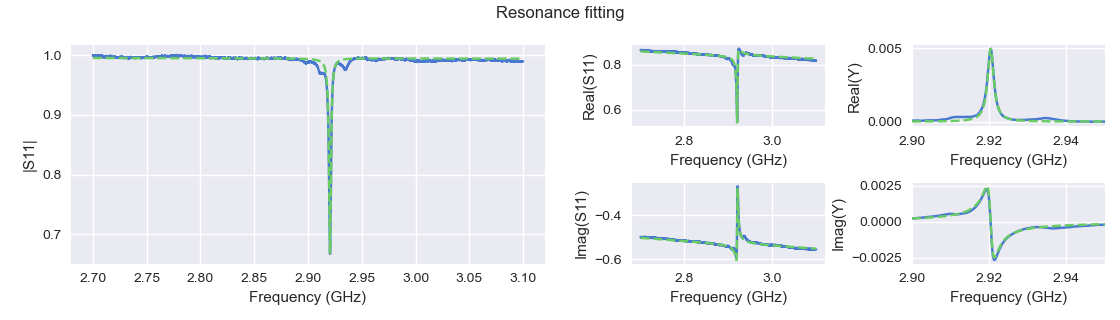

In [6]:
s11_fit, Z_total, popt, Y_list = bvd_model.fit_BVD_model_resonances(start1=fbs, end1=frs, start2=fre, end2=fbe,
                                                            bg_params=BG_fit_params, RS_fit_params_manual=None,
                                                            plot_fit=True, figscale=0.8)
[Lm, Cm, Rm] = popt
print('Lm =', Lm, 'nH;', 'Cm =', Cm, 'nF;', 'Rm =', Rm, 'Ohm')

**More details about fitting:**

When fitting complex numbers, we need to seperate real & and imaginary parts and stack them so that the optimizer will optimize the least square of $|Re(F_{fit}) - Re(F_{data})| + |Im(F_{fit}) - Im(F_{data})|$. 

Thus, for <span style="color:blue">bvd_model.fit_BVD_model_background</span> method, we can write: $$Re(Z_{bg,fit}) = Rs + \dfrac{R_p}{1 + (wC_pR_p)^2}$$ $$Im(Z_{bg,fit}) = wL_s - \dfrac{wR_p^2C_p}{1 + (wR_pC_p)^2}$$ which is implemented in <span style="color:purple">Z_background</span> function.

For <span style="color:blue">bvd_model.fit_BVD_model_resonances</span> method: we can write: $$Re(Y_{a,fit}) = \dfrac{R_m}{R_m^2 + (wL_m - \dfrac{1}{wC_m})}$$ $$Im(Y_{a,fit}) = -\dfrac{wL_m - \dfrac{1}{wC_m}}{R_m^2 + (wL_m - \dfrac{1}{wC_m})}$$ which is implemented in <span style="color:purple">Y_resonance</span> function.

When fitting the resonance, a key step is to find good initial guesses. For RLC circuit, at resonance frequencies $w_r$ (peak of real admittance) and $w_l$ (dip of imaginary admittance), we can compute:
$$R_{m0} = \dfrac{1}{Y_{a}[w_r]}$$
$$L_{m0} = \dfrac{R_{m0} * w_l}{w_l^2 - w_r^2} $$
$$C_{m0} = \dfrac{1}{L_{m0} * w_r^2}$$

These initial guesses [Lm0, Cm0, Rm0] will be fed into the <span style="color:orange">curve_fit</span> optimizer to assist convergence.

**Loading .prn file:**

We can also load .prn file. However, this will likely prompt you to install a 'matlabengin' libray, which can be done with "python pip install matlabengine" cammand. It also requires Matlab is already installed on the computer.

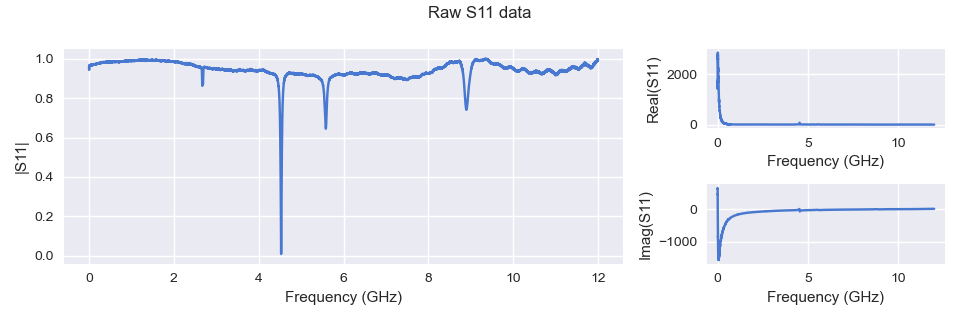

In [8]:
bvd_model.load_file('3-S22-pol-span500M-4k-1prn.prn')
bvd_model.plot_s11(figscale=0.8)

From the |S11| plot, we set <span style="color:green">[fbs, frs, fre, fbe]</span> as before.

Ls = 0.2609268708011194 nH; Rs = 2.164788916496168 Ohm; Rp = 6893.990305717491 Ohm; Cp = 0.00082667040865783 nF
Lm = 145.48679520207793 nH; Cm = 8.535864579693588e-06 nF; Rm = 24.32589033819095 Ohm


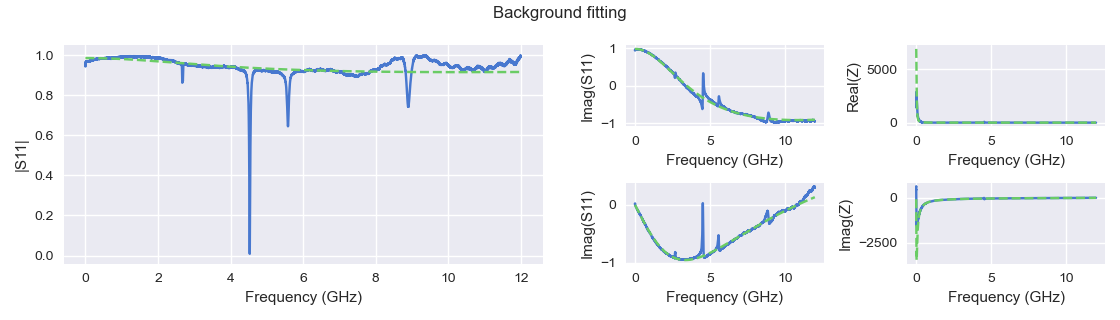

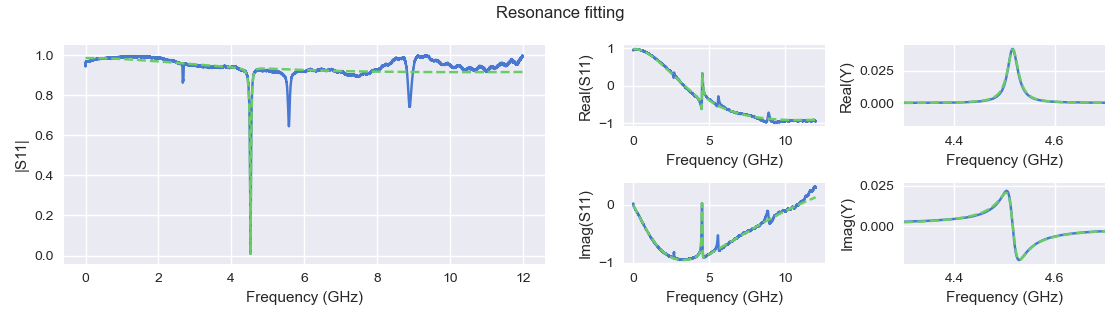

In [9]:
fbs, frs, fre, fbe = 2e9, 4.3e9, 4.7e9, 10e9
_, _, BG_fit_params = bvd_model.fit_BVD_model_background(start1=fbs, end1=frs, start2=fre, end2=fbe,
                                                          plot_fit=True, figscale=0.8)
[Ls, Rs, Rp, Cp] = BG_fit_params
print('Ls =', Ls, 'nH;', 'Rs =', Rs, 'Ohm;', 'Rp =', Rp, 'Ohm;', 'Cp =', Cp, 'nF')
s11_fit, Z_total, popt, Y_list = bvd_model.fit_BVD_model_resonances(start1=fbs, end1=frs, start2=fre, end2=fbe,
                                                            bg_params=BG_fit_params, RS_fit_params_manual=None,
                                                            plot_fit=True, figscale=0.8)
[Lm, Cm, Rm] = popt
print('Lm =', Lm, 'nH;', 'Cm =', Cm, 'nF;', 'Rm =', Rm, 'Ohm')